# Загрузка и отображение данных


In [1]:
import urllib

In [2]:
url = "http://textfiles.com/science/blackhol.txt"
file = urllib.request.urlopen(url)
text = open("text.txt","w")

In [3]:
for line in file:
    decoded_line = line.decode("utf-8")
    text.write(str(decoded_line))

In [4]:
f = open('text.txt', "r")
text = f.read()
print(text)

                           Combat Arms
                         2869 Grove Way
              Castro Valley, California 94546-6709
                    Telephone (415) 538-6544


     The following material was downloaded from the NASA SpaceLink
BBS at the National Aeronautics and Space Administration, George C.
Marshall Space Flight Center, Marshall Space Flight Center, Alabama
35812 on 11/16/88.



B L A C K    H O L E S    I N    S P A C E
-------------------------------------------------------------
 
     There is much more to black holes than meets the eye.  In fact,
your eyes, even with the aid of the most advanced telescope, will
never see a black hole in space.  The reason is that the matter
within a black hole is so dense and has so great a gravitational pull
that it prevents even light from escaping.
 
     Like other electromagnetic radiation (radio waves, infrared
rays, ultraviolet radiation, X-rays, and gamma radiation), light is
the fastest traveler in the Universe.  It mo

In [5]:
len(text)


8067

In [6]:
text[:300]

'                           Combat Arms\n                         2869 Grove Way\n              Castro Valley, California 94546-6709\n                    Telephone (415) 538-6544\n\n\n     The following material was downloaded from the NASA SpaceLink\nBBS at the National Aeronautics and Space Administration'

# Предварительная обработка (препроцессинг) текста
Для проведения частотного анализа и определения тематики текста рекомендуется выполнить очистку текста от знаков пунктуации, лишних пробельных символов и цифр. Сделать это можно различными способами – с помощью встроенных функций работы со строками, с помощью регулярных выражений, с помощью операций обработки списков или другим способом.

In [7]:
# перевод в единый регистр (например, нижний)
text = text.lower()

In [8]:
import string
# string.punctuation

In [9]:
type(string.punctuation)

str

In [10]:
# spec_chars = string.punctuation + '\xa0«»\t—…'
spec_chars = '\xa0«»\t—…!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'

In [11]:
%%time
text = "".join([ch for ch in text if ch not in spec_chars])

CPU times: user 776 µs, sys: 44 µs, total: 820 µs
Wall time: 823 µs


In [12]:
import re
text = re.sub('\n', ' ', text)

In [13]:
# print(text)

In [14]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [15]:
%%time
text = remove_chars_from_text(text, spec_chars)

CPU times: user 848 µs, sys: 41 µs, total: 889 µs
Wall time: 898 µs


In [16]:
print(text)

                           combat arms                          2869 grove way               castro valley california 945466709                     telephone 415 5386544        the following material was downloaded from the nasa spacelink bbs at the national aeronautics and space administration george c. marshall space flight center marshall space flight center alabama 35812 on 111688.    b l a c k    h o l e s    i n    s p a c e         there is much more to black holes than meets the eye.  in fact your eyes even with the aid of the most advanced telescope will never see a black hole in space.  the reason is that the matter within a black hole is so dense and has so great a gravitational pull that it prevents even light from escaping.        like other electromagnetic radiation radio waves infrared rays ultraviolet radiation xrays and gamma radiation light is the fastest traveler in the universe.  it moves at nearly 300000 kilometers about 186000 miles per second.  at such a speed yo

In [17]:
%%time
text = remove_chars_from_text(text, string.digits)

CPU times: user 963 µs, sys: 89 µs, total: 1.05 ms
Wall time: 1.06 ms


In [18]:
# print(text)

# Токенизация текста
Токенизация — самый первый шаг при обработке текста.
[Примеры токенизации](https://www.nltk.org/api/nltk.tokenize)

In [19]:
# токенайзер по пробелам (банально, да)
from nltk.tokenize import WhitespaceTokenizer
text = text.replace(".", " .")

In [20]:
tokenizer = WhitespaceTokenizer()
text = tokenizer.tokenize(text)
# text = nltk.word_tokenize(text)

In [21]:
text = list(filter(lambda x: x if (len(x)>1 or x == '.') else None, text))

In [22]:
print(text)

['combat', 'arms', 'grove', 'way', 'castro', 'valley', 'california', 'telephone', 'the', 'following', 'material', 'was', 'downloaded', 'from', 'the', 'nasa', 'spacelink', 'bbs', 'at', 'the', 'national', 'aeronautics', 'and', 'space', 'administration', 'george', '.', 'marshall', 'space', 'flight', 'center', 'marshall', 'space', 'flight', 'center', 'alabama', 'on', '.', 'there', 'is', 'much', 'more', 'to', 'black', 'holes', 'than', 'meets', 'the', 'eye', '.', 'in', 'fact', 'your', 'eyes', 'even', 'with', 'the', 'aid', 'of', 'the', 'most', 'advanced', 'telescope', 'will', 'never', 'see', 'black', 'hole', 'in', 'space', '.', 'the', 'reason', 'is', 'that', 'the', 'matter', 'within', 'black', 'hole', 'is', 'so', 'dense', 'and', 'has', 'so', 'great', 'gravitational', 'pull', 'that', 'it', 'prevents', 'even', 'light', 'from', 'escaping', '.', 'like', 'other', 'electromagnetic', 'radiation', 'radio', 'waves', 'infrared', 'rays', 'ultraviolet', 'radiation', 'xrays', 'and', 'gamma', 'radiation', 

# Стоп-слова
Стоп-слова — высокочастотные слова, которые не дают нам никакой информации о конкретном тексте. Они составляют верхушку частотного списка в любом языке. Набор стоп-слов не универсален, он будет зависеть от вашей задачи!

In [23]:
import nltk
# nltk.download()
from nltk.corpus import stopwords

In [24]:
# смотрим, какие языки есть
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [25]:
stopwords_ru = stopwords.words('english') 
stopwords_ru[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [26]:
text = [word for word in text if not word in stopwords.words()]

In [27]:
print(len(" ".join(text)))

5356


# Нормализация

Стемминг — отсечение от слова окончаний и суффиксов, чтобы оставшаяся часть, называемая stem, была одинаковой для всех грамматических форм слова. Стем необязательно совпадает с морфлогической основой слова. Одинаковый стем может получиться и не у однокоренных слов и наоборот — в этом проблема стемминга.

1-ый вид ошибки: белый, белка, белье $\implies$ бел

2-ой вид ошибки: трудность, трудный $\implies$ трудност, труд

3-ий вид ошибки: быстрый, быстрее $\implies$ быст, побыстрее $\implies$ побыст

Самый простой алгоритм, алгоритм Портера, состоит из 5 циклов команд, на каждом цикле – операция удаления / замены суффикса. Возможны вероятностные расширения алгоритма.


## Лемматизация и стемминг – это частные случаи нормализации и они отличаются.

Стемминг – это грубый эвристический процесс, который отрезает «лишнее» от корня слов, часто это приводит к потере словообразовательных суффиксов.

Лемматизация – это более тонкий процесс, который использует словарь и морфологический анализ, чтобы в итоге привести слово к его канонической форме – лемме.

Отличие в том, что стеммер (конкретная реализация алгоритма стемминга – прим.переводчика) действует без знания контекста и, соответственно, не понимает разницу между словами, которые имеют разный смысл в зависимости от части речи. Однако у стеммеров есть и свои преимущества: их проще внедрить и они работают быстрее. Плюс, более низкая «аккуратность» может не иметь значения в некоторых случаях.

Примеры:

Слово good – это лемма для слова better. Стеммер не увидит эту связь, так как здесь нужно сверяться со словарем.
Слово play – это базовая форма слова playing. Тут справятся и стемминг, и лемматизация.
Слово meeting может быть как нормальной формой существительного, так и формой глагола to meet, в зависимости от контекста. В отличие от стемминга, лемматизация попробует выбрать правильную лемму, опираясь на контекст.

Теперь, когда мы знаем, в чем разница, давайте рассмотрим пример:


In [28]:
text_normalization = " ".join([str(item) for item in text])
print(text_normalization)

combat arms grove way castro valley california telephone following material downloaded nasa spacelink bbs national aeronautics space administration george . marshall space flight center marshall space flight center alabama . much black holes meets eye . fact eyes even aid advanced telescope never see black hole space . reason matter within black hole dense great gravitational pull prevents even light escaping . like electromagnetic radiation radio waves infrared rays ultraviolet radiation xrays gamma radiation light fastest traveler universe . moves nearly kilometers miles second . speed could circle earth seven times heartbeats . light cant escape black hole follows nothing else . consequently direct way detect black hole . fact principal evidence existence black holes comes observation solutions complex equations based einsteins theory general relativity . among things calculations indicate black holes may occur variety sizes abundant us realize . mini black holes black holes theoriz

In [29]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text_normalization)

In [30]:
stemmer = nltk.stem.PorterStemmer()

text_stemming = " ".join(stemmer.stem(token) for token in tokens)

In [31]:
print(text_stemming)

combat arm grove way castro valley california telephon follow materi download nasa spacelink bb nation aeronaut space administr georg . marshal space flight center marshal space flight center alabama . much black hole meet eye . fact eye even aid advanc telescop never see black hole space . reason matter within black hole dens great gravit pull prevent even light escap . like electromagnet radiat radio wave infrar ray ultraviolet radiat xray gamma radiat light fastest travel univers . move nearli kilomet mile second . speed could circl earth seven time heartbeat . light cant escap black hole follow noth els . consequ direct way detect black hole . fact princip evid exist black hole come observ solut complex equat base einstein theori gener rel . among thing calcul indic black hole may occur varieti size abund us realiz . mini black hole black hole theoriz nearli old big bang hypothes start univers billion year ago . rapid earli expans part dens hot matter nascent univers said compress 

# Лемматизация
Лемматизация — процесс приведения словоформы к лемме, т.е. нормальной (словарной) форме. Это более сложная задача, чем стемминг, но и результаты дает гораздо более осмысленные, особенно для языков с богатой морфологией.

кошке, кошку, кошкам, кошкой $\implies$ кошка
бежал, бежит, бегу $\implies$ бежать
белому, белым, белыми $\implies$ белый

In [32]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text_stemming)

In [33]:
lemmatizator = nltk.stem.WordNetLemmatizer()
text_lemmatization = " ".join(lemmatizator.lemmatize(token) for token in tokens)

In [34]:
tokenizer = WhitespaceTokenizer()
text_lemmatization = tokenizer.tokenize(text_lemmatization)

In [35]:
print(text_lemmatization)

['combat', 'arm', 'grove', 'way', 'castro', 'valley', 'california', 'telephon', 'follow', 'materi', 'download', 'nasa', 'spacelink', 'bb', 'nation', 'aeronaut', 'space', 'administr', 'georg', '.', 'marshal', 'space', 'flight', 'center', 'marshal', 'space', 'flight', 'center', 'alabama', '.', 'much', 'black', 'hole', 'meet', 'eye', '.', 'fact', 'eye', 'even', 'aid', 'advanc', 'telescop', 'never', 'see', 'black', 'hole', 'space', '.', 'reason', 'matter', 'within', 'black', 'hole', 'den', 'great', 'gravit', 'pull', 'prevent', 'even', 'light', 'escap', '.', 'like', 'electromagnet', 'radiat', 'radio', 'wave', 'infrar', 'ray', 'ultraviolet', 'radiat', 'xray', 'gamma', 'radiat', 'light', 'fastest', 'travel', 'univers', '.', 'move', 'nearli', 'kilomet', 'mile', 'second', '.', 'speed', 'could', 'circl', 'earth', 'seven', 'time', 'heartbeat', '.', 'light', 'cant', 'escap', 'black', 'hole', 'follow', 'noth', 'el', '.', 'consequ', 'direct', 'way', 'detect', 'black', 'hole', '.', 'fact', 'princip',

In [36]:
print("Символов до нормализации: %d"%(len(" ".join(text))))
print("Символов после стемминга: %d"%(len(text_stemming)))
print("Символов после лемматизации: %d"%len(" ".join(text_lemmatization)))

Символов до нормализации: 5356
Символов после стемминга: 4668
Символов после лемматизации: 4657


# Исправление опечаток
[Простейший спеллчекер Норвига](https://norvig.com/spell-correct.html)

# Подсчёт статистики встречаемости слов в тексте

In [37]:
%%time
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist

CPU times: user 838 µs, sys: 28 µs, total: 866 µs
Wall time: 1.14 ms


FreqDist({'.': 66, 'star': 21, 'stars': 15, 'black': 14, 'holes': 9, 'hole': 9, 'mass': 9, 'white': 9, 'would': 8, 'radio': 7, ...})

In [38]:
fdist.most_common(5)

[('.', 66), ('star', 21), ('stars', 15), ('black', 14), ('holes', 9)]

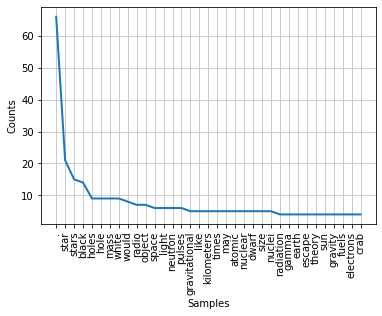

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
fdist.plot(35,cumulative=False)

# С параметром cumulative=False график иллюстрирует закон Ципфа
**Закон Ципфа** («ранг—частота»). Например, Если все слова достаточно длинного текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n.
Второе по используемости слово встречается примерно в два раза реже, чем первое, третье — в три раза реже, чем первое, и т.д.

In [40]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://ic.pics.livejournal.com/eponim2008/17443609/234916/234916_original.jpg")

https://github.com/ancatmara/data-science-nlp/blob/master/1.%20Intro.ipynb

Закон назван именем американского лингвиста Джорджа Ципфа (правда, популяризировал он данную закономерность не для лингвистических данных, а для описания распределения экономических сил и социального статуса). Если закон Ципфа соблюдается — значит, перед вами нормальный текст на естественном языке. Если нет, то что-то с ним не так.

# Визуализация

In [41]:
from wordcloud import WordCloud

In [42]:
import sys
print(sys.executable)

/Users/eldaroid/anaconda3/bin/python


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
text_raw = " ".join(text)

In [45]:
wordcloud = WordCloud().generate(text_raw)

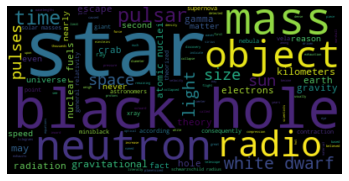

In [46]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Векторизация
Создаем векторы документа и строим итоговую матрицутермы-на-документы.

In [47]:
text = " ".join(word for word in text)
text = text.replace(" .", ".")
# print(text)

https://habr.com/ru/company/Voximplant/blog/446738/
Регулярное выражение (регулярка, regexp, regex) – это последовательность символов, которая определяет шаблон поиска. Например:

In [48]:
text = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
# print(text)

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(min_df=2, max_df=0.5, ngram_range = (1,2))
features = count_vectorizer.fit_transform(text)

pd.DataFrame(
    features.todense(),
    columns = count_vectorizer.get_feature_names()
)

,according,among,astronomers,atomic,atomic nuclei,based,believed,black,black hole,black holes,...,waves,way,weigh,white,white dwarf,white dwarfs,would,would weigh,xray,years
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range = (1,2))
features = tfidf_vectorizer.fit_transform(text)

pd.DataFrame(
    features.todense(),
    columns = tfidf_vectorizer.get_feature_names()
)

,according,among,astronomers,atomic,atomic nuclei,based,believed,black,black hole,black holes,...,waves,way,weigh,white,white dwarf,white dwarfs,would,would weigh,xray,years
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.609497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.397467,0.000000,0.490156,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.267841,0.316828,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.234437,0.277314,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.382294,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1,2))
features = tfidf_vectorizer.fit_transform(text)

df = pd.DataFrame(
    features.todense(),
    columns = tfidf_vectorizer.get_feature_names()
)

df.mean(axis=0).sort_values()

thermal energy    0.002076
lives long        0.002076
long              0.002076
long thermal      0.002076
sky               0.002076
                    ...   
mass              0.022124
white             0.025129
black             0.028281
stars             0.030955
star              0.034818
Length: 969, dtype: float64

In [69]:
tfidf_vectorizer = TfidfVectorizer(max_features=3, ngram_range = (1,2))
features = tfidf_vectorizer.fit_transform(text)

pd.DataFrame(
    features.todense(),
    columns = tfidf_vectorizer.get_feature_names()
)

,black,star,stars
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
62,0.0,1.0,0.0
63,0.0,1.0,0.0
64,0.0,1.0,0.0
65,0.0,0.0,0.0


# kmeans кластеризация текста

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

https://pythonprogramminglanguage.com/kmeans-text-clustering/
https://habr.com/ru/post/67078/

In [61]:
vectorizer = TfidfVectorizer(ngram_range = (1,2))
X = vectorizer.fit_transform(text)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 white
 black
 space
 star
 dwarf
 white dwarf
 would
 pulsars
 theorized
 named
Cluster 1:
 stars
 mass
 star
 may
 hole
 holes
 black
 consequently
 suns mass
 suns


Prediction
[0]
[0]


In [57]:
print(vectorizer)

TfidfVectorizer(stop_words='english')
